<a href="https://colab.research.google.com/github/spindouken/holbertonschool-machine_learning/blob/master/unsupervised_learning/clustering/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn.cluster
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[30.06722465 40.41123947]
 [20.0835633  69.81592298]
 [39.62770705 19.89843487]
 [ 9.92511389 25.73098987]
 [59.22766628 29.19796006]]


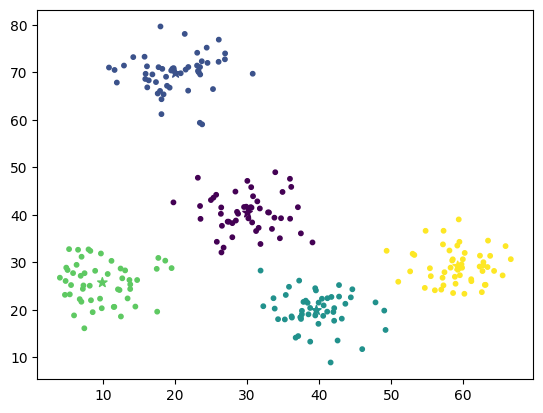

In [12]:
def kmeans(X, k):
    """
    performs K-means on a dataset

    X is a numpy.ndarray of shape (n, d) containing the dataset
    k is the number of clusters
    Returns: C, clss
        C is a numpy.ndarray of shape (k, d) containing the centroid means
            for each cluster
        clss is a numpy.ndarray of shape (n,) containing the index of the
            cluster in C that each data point belongs to
    """
    if not isinstance(X, np.ndarray) or len(X.shape) != 2:
        return None
    if not isinstance(k, int) or k <= 0:
        return None

    cluster = sklearn.cluster
    C, clss, _ = cluster.k_means(X, k)
    return C, clss

if __name__ == "__main__":
    np.random.seed(0)
    a = np.random.multivariate_normal([30, 40], [[16, 0], [0, 16]], size=50)
    b = np.random.multivariate_normal([10, 25], [[16, 0], [0, 16]], size=50)
    c = np.random.multivariate_normal([40, 20], [[16, 0], [0, 16]], size=50)
    d = np.random.multivariate_normal([60, 30], [[16, 0], [0, 16]], size=50)
    e = np.random.multivariate_normal([20, 70], [[16, 0], [0, 16]], size=50)
    X = np.concatenate((a, b, c, d, e), axis=0)
    np.random.shuffle(X)

    C, clss = kmeans(X, 5)
    print(C)
    plt.scatter(X[:, 0], X[:, 1], s=10, c=clss)
    plt.scatter(C[:, 0], C[:, 1], s=50, marker='*', c=list(range(5)))
    plt.show()


[0.06076528 0.68866245 0.1720333  0.07853898]
[[60.21013227 30.23755701]
 [30.59423371 40.74616259]
 [18.38259484 32.58443509]
 [20.00603516 70.02132459]]
[[[ 1.66832836e+01  2.71681683e-02]
  [ 2.71681683e-02  1.66374317e+01]]

 [[ 7.00362840e+01 -3.25942844e+00]
  [-3.25942844e+00  7.79993943e+01]]

 [[ 1.52442851e+02  8.07246145e+01]
  [ 8.07246145e+01  6.42697318e+01]]

 [[ 3.54992194e+01  1.13134592e+01]
  [ 1.13134592e+01  3.21422638e+01]]]
189777.98746919443


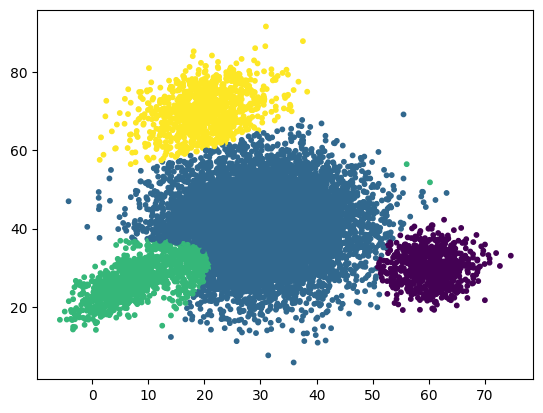

In [13]:
def gmm(X, k):
    """
    calculates a GMM from a dataset

    X is a numpy.ndarray of shape (n, d) containing the dataset
    k is the number of clusters
    Returns: pi, m, S, clss, bic
        pi is a numpy.ndarray of shape (k,) containing the cluster priors
        m is a numpy.ndarray of shape (k, d) containing the centroid means
        S is a numpy.ndarray of shape (k, d, d) containing the covariance
            matrices
        clss is a numpy.ndarray of shape (n,) containing the cluster indices
            for each data point
        bic is a numpy.ndarray of shape (kmax - kmin + 1) containing the BIC
            value for each cluster size tested
    """
    if not isinstance(X, np.ndarray) or not isinstance(k, int):
        return None, None, None, None, None

    if len(X.shape) != 2 or len(X.shape) < 1 or k <= 0:
        return None, None, None, None, None

    GMM = sklearn.mixture.GaussianMixture(k).fit(X)

    return (
        GMM.weights_,
        GMM.means_,
        GMM.covariances_,
        GMM.predict(X),
        GMM.bic(X),
    )

if __name__ == '__main__':
    np.random.seed(11)
    a = np.random.multivariate_normal([30, 40], [[75, 5], [5, 75]], size=10000)
    b = np.random.multivariate_normal([5, 25], [[16, 10], [10, 16]], size=750)
    c = np.random.multivariate_normal([60, 30], [[16, 0], [0, 16]], size=750)
    d = np.random.multivariate_normal([20, 70], [[35, 10], [10, 35]], size=1000)
    X = np.concatenate((a, b, c, d), axis=0)
    np.random.shuffle(X)

    pi, m, S, clss, bic = gmm(X, 4)
    print(pi)
    print(m)
    print(S)
    print(bic)
    plt.scatter(X[:, 0], X[:, 1], s=10, c=clss)
    plt.scatter(m[:, 0], m[:, 1], s=50, marker='*', c=list(range(4)))
    plt.show()


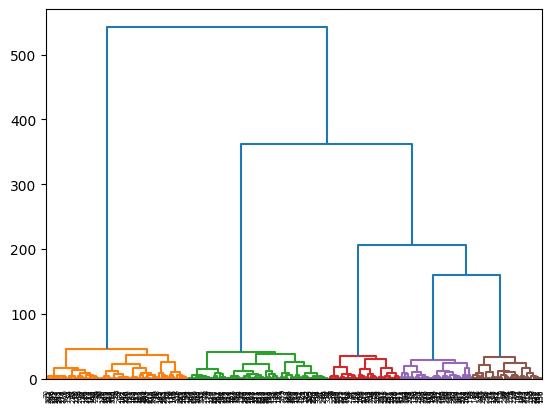

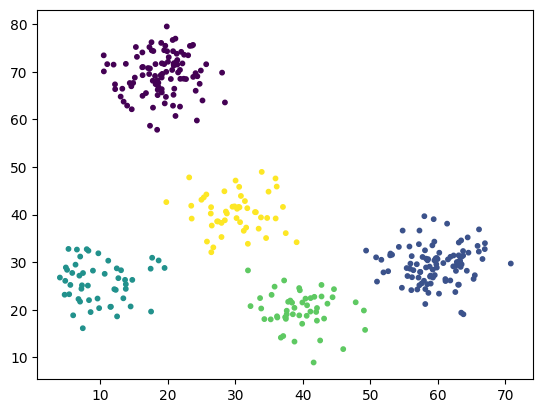

In [14]:
def agglomerative(X, dist):
    """
    performs agglomerative clustering on a dataset

    X is a numpy.ndarray of shape (n, d) containing the dataset
    dist is the maximum cophenetic distance for all clusters

    Performs agglomerative clustering with Ward linkage
    Displays the dendrogram with each cluster displayed in a different color

    Returns: clss, a numpy.ndarray of shape (n,) containing the cluster
        indices for each data point
    """
    # calculate linkage matrix using ward linkage
    linkageMatrix = scipy.cluster.hierarchy.linkage(X, 'ward')
    # generate cluster labels for data points
    clss = scipy.cluster.hierarchy.fcluster(linkageMatrix, dist, 'distance')
    # create dendrogram
    scipy.cluster.hierarchy.dendrogram(linkageMatrix, color_threshold=dist)
    plt.show()

    return clss

if __name__ == '__main__':
    np.random.seed(0)
    a = np.random.multivariate_normal([30, 40], [[16, 0], [0, 16]], size=50)
    b = np.random.multivariate_normal([10, 25], [[16, 0], [0, 16]], size=50)
    c = np.random.multivariate_normal([40, 20], [[16, 0], [0, 16]], size=50)
    d = np.random.multivariate_normal([60, 30], [[16, 0], [0, 16]], size=100)
    e = np.random.multivariate_normal([20, 70], [[16, 0], [0, 16]], size=100)
    X = np.concatenate((a, b, c, d, e), axis=0)
    np.random.shuffle(X)

    clss = agglomerative(X, 100)
    plt.scatter(X[:, 0], X[:, 1], s=10, c=clss)
    plt.show()
